In [1471]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler  
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [1472]:
# Load the dataset
df = pd.read_csv('data.csv')
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [1473]:
#Drop the unnecessary columns.
col = ['id','Unnamed: 32']
df = df.drop(col,axis=1)

In [1474]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [1475]:
df.columns.isnull().sum()

0

In [1476]:
#Description of statistics from dataset
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [1477]:
df.head(5)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


/var/folders/b6/_rh6ggj93_99_g83htk80b4h0000gn/T/ipykernel_12580/2190125245.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(["Malignant", "Benign"])


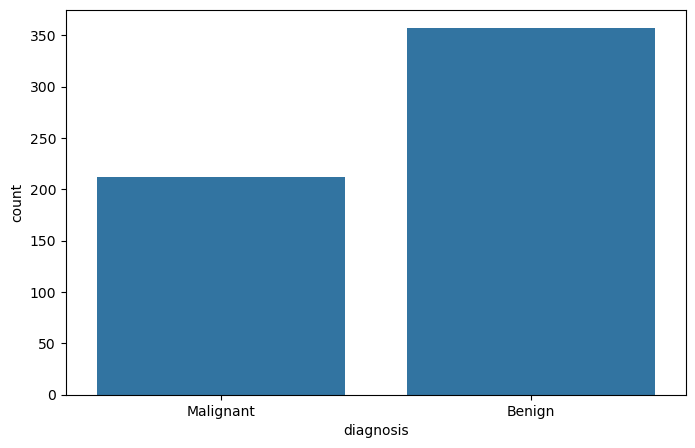

In [1478]:
plt.rcParams['figure.figsize'] = (8,5)
sns.countplot(x="diagnosis", data=df)
plt.gca().set_xticklabels(["Malignant", "Benign"])
plt.show()

In [1479]:
#Map the diagnosis column to numerical values
diagnosis_coder = {'M': 1, 'B': 0}
df['diagnosis'] = df['diagnosis'].map(diagnosis_coder)


In [1480]:
# Split the data into features and target variable
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [1481]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [1482]:
# Apply PCA 
pca = PCA(n_components=0.95, random_state=0)  
X_pca = pca.fit_transform(X_scaled)

explained = pca.explained_variance_ratio_
cum_explained = np.cumsum(explained)

print("Original feature dimensions:", X.shape[1])
print("Number of principal components selected:", X_pca.shape[1])
print("Explained variance per PC:", np.round(explained, 4))
print("Cumulative explained variance:", np.round(cum_explained, 4))


Original feature dimensions: 30
Number of principal components selected: 10
Explained variance per PC: [0.531  0.1728 0.0711 0.0641 0.0409 0.0307 0.0158 0.0119 0.0099 0.0095]
Cumulative explained variance: [0.531  0.7038 0.775  0.8391 0.8799 0.9106 0.9265 0.9384 0.9483 0.9577]


<hr>

## Principal Component Analysis (PCA) Results

- **Original feature dimensions:** 30  
- **Number of principal components selected:** 10  
- **Explained variance per principal component:**  
  [0.531, 0.1728, 0.0711, 0.0641, 0.0409, 0.0307, 0.0158, 0.0119, 0.0099, 0.0095]  

- **Cumulative explained variance:**  
  [0.531, 0.7038, 0.775, 0.8391, 0.8799, 0.9106, 0.9265, 0.9384, 0.9483, 0.9577]  

### Interpretation:
- The first **2 PCs** already explain about **70%** of the variance.  
- The first **4 PCs** explain about **84%** of the variance.  
- With **10 PCs**, the model retains about **95.8% of the total variance**.  



<hr>

**Visualization**

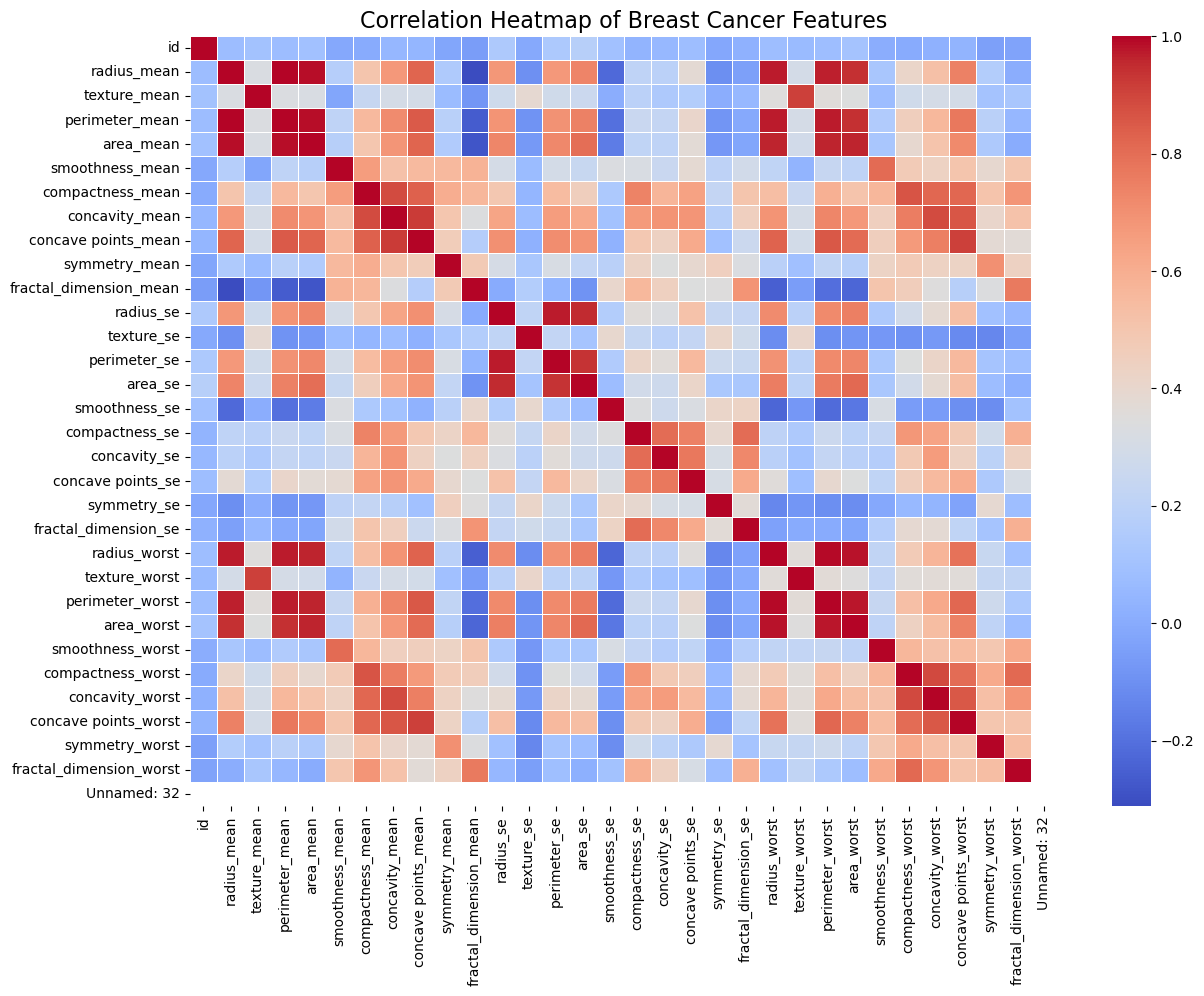

In [1483]:
# Drop diagnosis column if it's still present (since it's categorical)
corr_matrix = data.drop(columns=["diagnosis"]).corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of Breast Cancer Features", fontsize=16)
plt.show()

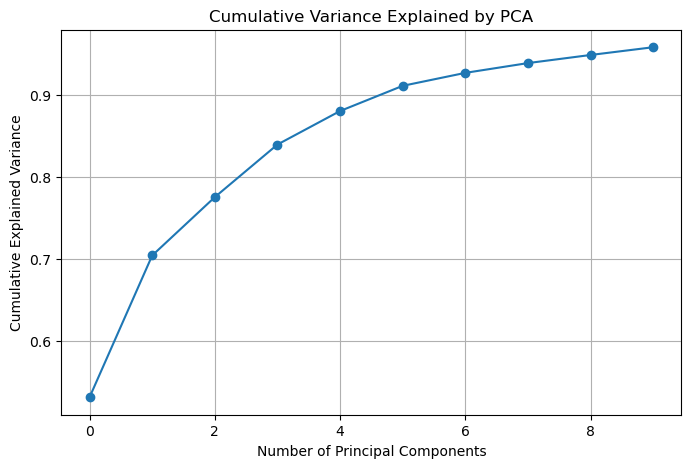

In [1484]:
# Plot cumulative explained variance
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Variance Explained by PCA")
plt.grid(True)
plt.show()

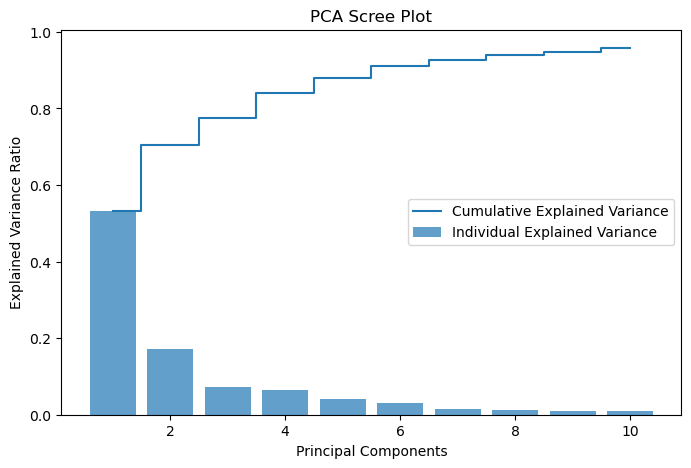

In [1485]:
# Visualize the data projected onto the first two principal components
plt.figure(figsize=(8,5))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1),
        pca.explained_variance_ratio_,
        alpha=0.7, align="center", label="Individual Explained Variance")
plt.step(range(1, len(cum_explained)+1),
         cum_explained, where="mid", label="Cumulative Explained Variance")
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Principal Components")
plt.title("PCA Scree Plot")
plt.legend(loc="best")
plt.show()


<br>

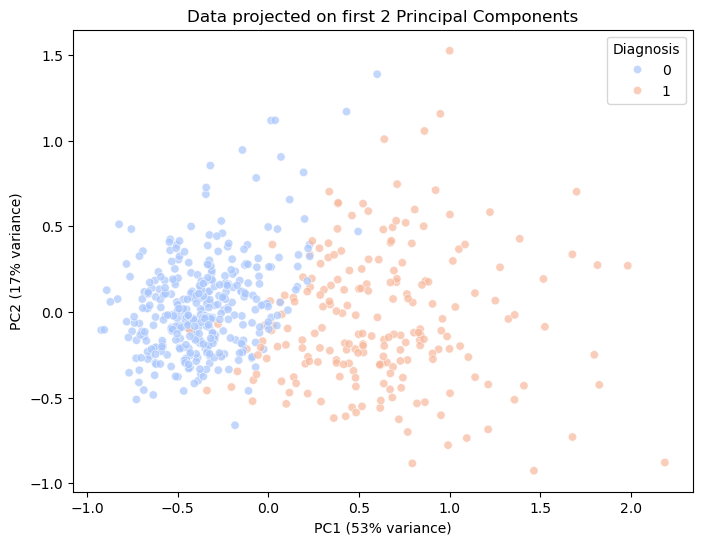

In [1486]:
# Visualize the data projected onto the first two principal components
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette="coolwarm", alpha=0.7)
plt.xlabel("PC1 (53% variance)")
plt.ylabel("PC2 (17% variance)")
plt.title("Data projected on first 2 Principal Components")
plt.legend(title="Diagnosis")
plt.show()


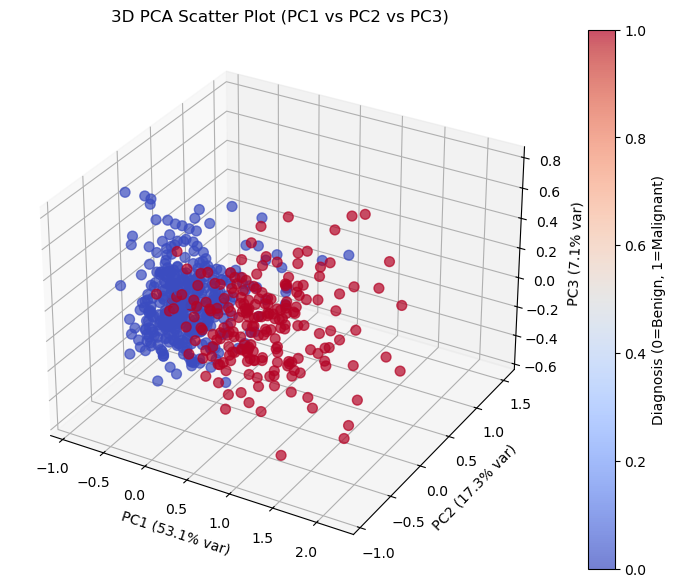

In [1487]:
# 3D PCA Scatter Plot
# Take first 3 PCs
X_pca3 = pca.transform(X_scaled)[:, :3]

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Plot 3D scatter, color by diagnosis (0 = benign, 1 = malignant)
scatter = ax.scatter(
    X_pca3[:,0], X_pca3[:,1], X_pca3[:,2],
    c=y, cmap='coolwarm', s=50, alpha=0.7
)

# Axis labels with variance explained
ax.set_xlabel(f"PC1 ({explained[0]*100:.1f}% var)")
ax.set_ylabel(f"PC2 ({explained[1]*100:.1f}% var)")
ax.set_zlabel(f"PC3 ({explained[2]*100:.1f}% var)")

plt.title("3D PCA Scatter Plot (PC1 vs PC2 vs PC3)")
plt.colorbar(scatter, label="Diagnosis (0=Benign, 1=Malignant)")
plt.show()


### PCA Results & Visualizations

- PC1 explains **53.1%** variance, PC2 adds **17.3%**, PC3 adds **7.1%**.  
- The first **10 PCs retain 95.8% variance**, reducing dimensions from 30 → 10.  
- 2D scatter plot (PC1 vs PC2) shows good separation between benign and malignant classes.  
- 3D scatter plot (PC1, PC2, PC3) adds extra variance information but overlap is still visible.  
- PCA visualization shows partial class separation but not perfect separation.

<hr>

**HOMEWORK 2**

In [1488]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, precision_score, recall_score, f1_score
)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


In [1489]:
# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20,random_state=42, stratify=y
)


In [1490]:
classifiers = {
    "Decision Tree":   DecisionTreeClassifier(random_state=0),
    "Random Forest":   RandomForestClassifier(random_state=0),
    "KNN":             KNeighborsClassifier(),
    "Naive Bayes":     GaussianNB(),
    "ANN":             MLPClassifier(max_iter=1000, random_state=0)
}

In [1491]:
# Evaluate each classifier
rows = []
cms = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cms[name] = cm

    # Metrics
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)

    print(f"\n{name} Results:")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
    print(f"Accuracy: {acc:.4f}")

    rows.append({"Model": name, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1})




Decision Tree Results:
Confusion Matrix:
 [[68  4]
 [ 4 38]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9444    0.9444    0.9444        72
           1     0.9048    0.9048    0.9048        42

    accuracy                         0.9298       114
   macro avg     0.9246    0.9246    0.9246       114
weighted avg     0.9298    0.9298    0.9298       114

Accuracy: 0.9298

Random Forest Results:
Confusion Matrix:
 [[72  0]
 [ 4 38]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9474    1.0000    0.9730        72
           1     1.0000    0.9048    0.9500        42

    accuracy                         0.9649       114
   macro avg     0.9737    0.9524    0.9615       114
weighted avg     0.9668    0.9649    0.9645       114

Accuracy: 0.9649

KNN Results:
Confusion Matrix:
 [[71  1]
 [ 9 33]]
Classification Report:
               precision    recall  f1-score   support

         

In [1492]:
summary_df = pd.DataFrame(rows).set_index("Model").round(4).sort_values("F1", ascending=False)
display(summary_df)

# Show as Markdown 
from IPython.display import Markdown, display as md_display
md_display(Markdown("### Holdout Performance Summary\n" + summary_df.to_markdown()))

,Accuracy,Precision,Recall,F1
Model,,,,
Random Forest,0.9649,1.0000,0.9048,0.9500
Naive Bayes,0.9386,1.0000,0.8333,0.9091
Decision Tree,0.9298,0.9048,0.9048,0.9048
ANN,0.9298,1.0000,0.8095,0.8947
KNN,0.9123,0.9706,0.7857,0.8684


### Holdout Performance Summary
| Model         |   Accuracy |   Precision |   Recall |     F1 |
|:--------------|-----------:|------------:|---------:|-------:|
| Random Forest |     0.9649 |      1      |   0.9048 | 0.95   |
| Naive Bayes   |     0.9386 |      1      |   0.8333 | 0.9091 |
| Decision Tree |     0.9298 |      0.9048 |   0.9048 | 0.9048 |
| ANN           |     0.9298 |      1      |   0.8095 | 0.8947 |
| KNN           |     0.9123 |      0.9706 |   0.7857 | 0.8684 |

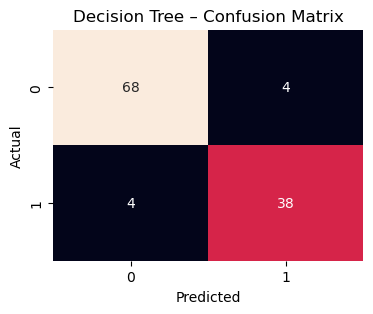

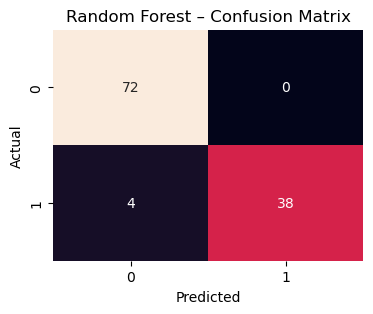

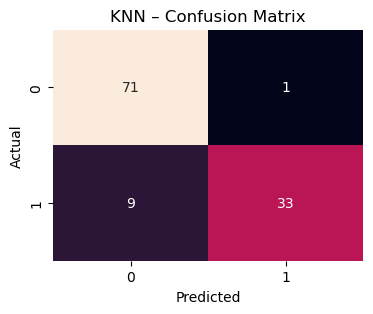

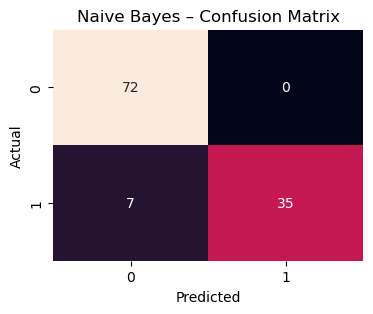

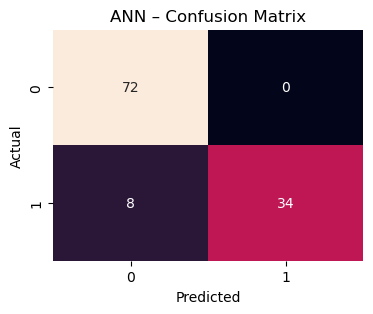

In [1493]:
# Plot confusion matrices
for name, cm in cms.items():
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cbar=False)
    plt.title(f"{name} – Confusion Matrix")
    plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.show()


In [1494]:
from sklearn.model_selection import StratifiedKFold, cross_validate
import pandas as pd

# StratifiedKFold keeps class balance in each fold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Metrics to compute
scoring = {
    "Accuracy": "accuracy",
    "Precision": "precision",
    "Recall": "recall",
    "F1": "f1"
}

cv_rows = []
for name, clf in classifiers.items():
    scores = cross_validate(clf, X, y, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False)

    cv_rows.append({
        "Model": name,
        "Accuracy (mean ± std)": f"{scores['test_Accuracy'].mean():.4f} ± {scores['test_Accuracy'].std():.4f}",
        "Precision (mean ± std)": f"{scores['test_Precision'].mean():.4f} ± {scores['test_Precision'].std():.4f}",
        "Recall (mean ± std)": f"{scores['test_Recall'].mean():.4f} ± {scores['test_Recall'].std():.4f}",
        "F1 (mean ± std)": f"{scores['test_F1'].mean():.4f} ± {scores['test_F1'].std():.4f}"
    })

cv_df = pd.DataFrame(cv_rows)
display(cv_df)

#print as markdown for report
from IPython.display import Markdown
display(Markdown("### 10-fold Cross-Validation Results\n" + cv_df.to_markdown(index=False)))


,Model,Accuracy (mean ± std),Precision (mean ± std),Recall (mean ± std),F1 (mean ± std)
0,Decision Tree,0.9191 ± 0.0238,0.8940 ± 0.0403,0.8911 ± 0.0528,0.8912 ± 0.0335
1,Random Forest,0.9596 ± 0.0236,0.9502 ± 0.0399,0.9431 ± 0.0595,0.9450 ± 0.0338
2,KNN,0.9350 ± 0.0293,0.9389 ± 0.0445,0.8866 ± 0.0832,0.9088 ± 0.0475
3,Naive Bayes,0.9368 ± 0.0305,0.9446 ± 0.0527,0.8861 ± 0.0861,0.9107 ± 0.0475
4,ANN,0.9333 ± 0.0357,0.9407 ± 0.0758,0.8864 ± 0.0684,0.9090 ± 0.0458


### 10-fold Cross-Validation Results
| Model         | Accuracy (mean ± std)   | Precision (mean ± std)   | Recall (mean ± std)   | F1 (mean ± std)   |
|:--------------|:------------------------|:-------------------------|:----------------------|:------------------|
| Decision Tree | 0.9191 ± 0.0238         | 0.8940 ± 0.0403          | 0.8911 ± 0.0528       | 0.8912 ± 0.0335   |
| Random Forest | 0.9596 ± 0.0236         | 0.9502 ± 0.0399          | 0.9431 ± 0.0595       | 0.9450 ± 0.0338   |
| KNN           | 0.9350 ± 0.0293         | 0.9389 ± 0.0445          | 0.8866 ± 0.0832       | 0.9088 ± 0.0475   |
| Naive Bayes   | 0.9368 ± 0.0305         | 0.9446 ± 0.0527          | 0.8861 ± 0.0861       | 0.9107 ± 0.0475   |
| ANN           | 0.9333 ± 0.0357         | 0.9407 ± 0.0758          | 0.8864 ± 0.0684       | 0.9090 ± 0.0458   |

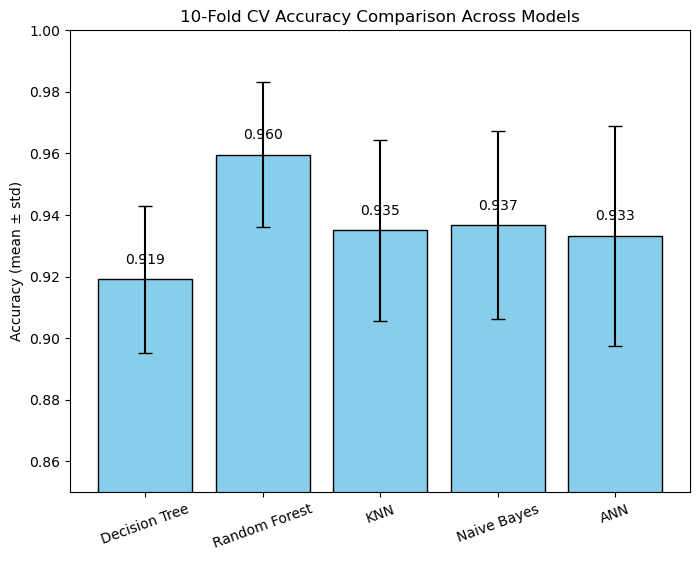

In [1495]:
import matplotlib.pyplot as plt
import numpy as np

# Example data from your CV results (replace with your computed values)
models = ["Decision Tree", "Random Forest", "KNN", "Naive Bayes", "ANN"]
mean_accuracy = [0.9191, 0.9596, 0.9350, 0.9368, 0.9333]
std_accuracy = [0.0238, 0.0236, 0.0293, 0.0305, 0.0357]

# Plot bar chart with error bars
plt.figure(figsize=(8,6))
plt.bar(models, mean_accuracy, yerr=std_accuracy, capsize=5, color="skyblue", edgecolor="black")
plt.ylim(0.85, 1.0)
plt.ylabel("Accuracy (mean ± std)")
plt.title("10-Fold CV Accuracy Comparison Across Models")

# Annotate bars with values
for i, v in enumerate(mean_accuracy):
    plt.text(i, v + 0.005, f"{v:.3f}", ha='center', fontsize=10)

plt.xticks(rotation=20)
plt.show()
